# ПИ21-1В
# Сабиров А.А.

## ML2.1 Классификация
Познакомиться с основными методами метрической классификации, их реализацией и приемами работы в scikit-learn.
### Задания для выполнения
1. Загрузите данные о диагностике сахарного диабета;
2. Разделите эти данные на тестовую и обучающую выборки;
3. Постройте модель классификации для определения заболевания;
4. Оцените качество модели на тестовой выборке с помощью следующих метрик:
    *   a. достоверность предсказания (accuracy);
    *   b. точность (precision);
    *   c. полнота (recall);
5. Сделайте вывод о применимости модели.

In [ ]:
import numpy as np

# Создание исходного массива
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Вычисление квантилей
quantiles = np.quantile(arr, q=[0, 1/3, 2/3, 1])

# Вывод границ партиций
print(quantiles)

[ 1.  4.  7. 10.]


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn import metrics

---
####  Загрузите данные о диагностике сахарного диабета (1)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ibbvs/jasa/main/ML-labs/data%20sources/diabetes.csv")

df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# Пропущенных значений нет, все признаки в числовом виде
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
def get_info(df):
    types = df.dtypes
    count_cols = df.apply(lambda item: item.nunique())
    unique_cols = df.apply(lambda item: item.unique())
    null_cols = df.isnull().sum()
    quantile_cols = pd.Series(list(map(lambda x: np.around(np.quantile(x, q=[0, 0.25, 0.5, 0.75, 1]), 1), unique_cols.values)), index=df.columns)
    descr_df = pd.concat([types, null_cols, count_cols, unique_cols, quantile_cols], axis=1)

    descr_df = descr_df.rename(columns={0: "Тип Данных", 1: "Количество пропущенных значений", 2: "Кол-во уникальных значений", 3: "Уникальные значения", 4: "0|25|50|75|100 % квантили"})
    descr_df.index.name = "Поле/Столбец"

    return descr_df


descr_df = get_info(df)


# как я понимаю в выборке, большая часть выборки  взрослые люди
descr_df

,Тип Данных,Количество пропущенных значений,Кол-во уникальных значений,Уникальные значения,0|25|50|75|100 % квантили
Поле/Столбец,,,,,
Pregnancies,int64,0,17,"[6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...","[0.0, 4.0, 8.0, 12.0, 17.0]"
Glucose,int64,0,136,"[148, 85, 183, 89, 137, 116, 78, 115, 197, 125...","[0.0, 95.8, 129.5, 163.2, 199.0]"
BloodPressure,int64,0,47,"[72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...","[0.0, 55.5, 74.0, 93.0, 122.0]"
SkinThickness,int64,0,51,"[35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...","[0.0, 19.5, 32.0, 44.5, 99.0]"
Insulin,int64,0,186,"[0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...","[0.0, 76.2, 151.0, 263.2, 846.0]"
BMI,float64,0,248,"[33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....","[0.0, 26.6, 33.7, 39.8, 67.1]"
DiabetesPedigreeFunction,float64,0,517,"[0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...","[0.1, 0.3, 0.4, 0.7, 2.4]"
Age,int64,0,52,"[50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...","[21.0, 33.8, 46.5, 59.2, 81.0]"
Outcome,int64,0,2,"[1, 0]","[0.0, 0.2, 0.5, 0.8, 1.0]"


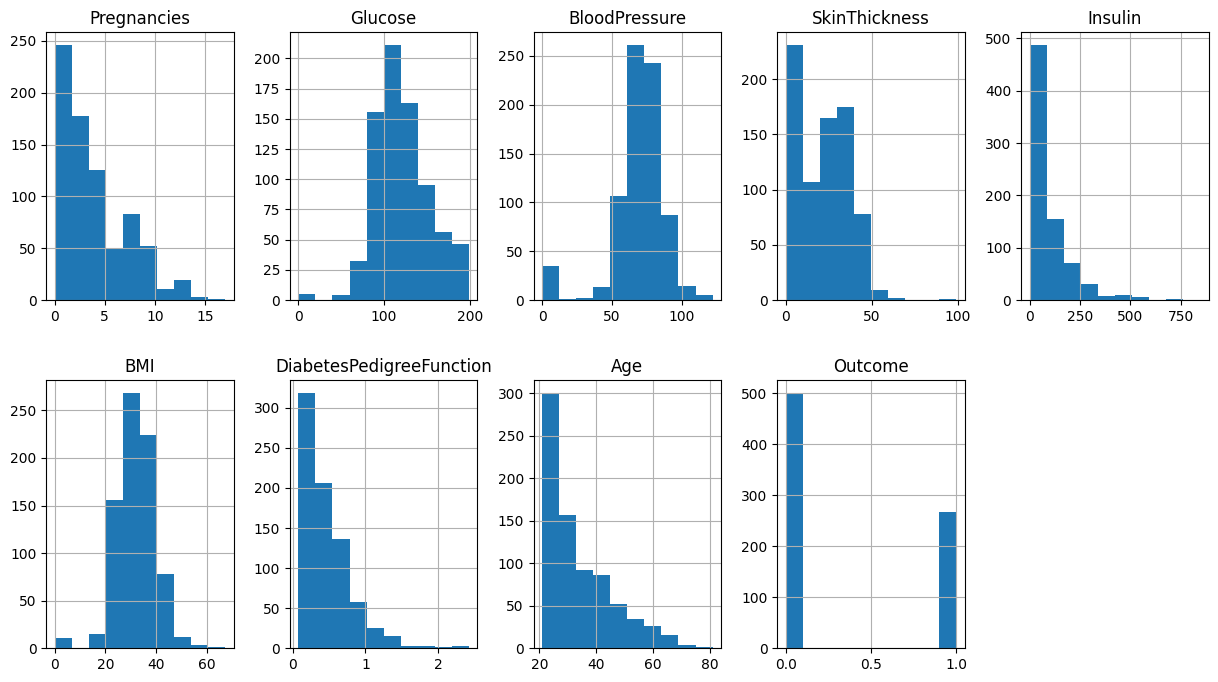

In [ ]:
# Выбросов вроде нет,
df.hist(figsize=(15, 8), layout=(-1, 5));



---
#### Разделите эти данные на тестовую и обучающую выборки (2)


In [ ]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



---
### Постройте модель классификации для определения заболевания (3)



In [ ]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

В линейных моделях коэффициенты имеют физический смысл - они показывают значимость соответствующих признаков. \
Поэтому представляет особый интерес посмотреть коэффициенты вместе с названиями признаков.

In [ ]:
# Чем больше значение коэффициента, тем он значимее
def print_coef(model, feat_names):
    print(f"{model}\nЧем больше значение коэффициента, тем он значимее\n{'*'*75}\n")

    bank = sorted(zip(feat_names, model.coef_[0]), key=lambda x: x[1], reverse=True)

    [print(f"{k:^30} = {v}") for k, v in bank]
    print(f"{'*'*75}\n\n")

    return np.argsort(model.coef_[0])[::-1]



order = print_coef(logistic, X.columns)

LogisticRegression(max_iter=1000)
Чем больше значение коэффициента, тем он значимее
***************************************************************************

   DiabetesPedigreeFunction    = 0.7061782053780293
         Pregnancies           = 0.11410673692557516
             BMI               = 0.09271582951386657
           Glucose             = 0.03693157665560616
             Age               = 0.01553023294177373
        SkinThickness          = 0.004521188233150348
           Insulin             = -0.001243710367238659
        BloodPressure          = -0.011161970246141777
***************************************************************************




Теперь можно построить по полученной модели прогноз. Для этого передадим в соответствующий метод нашу матрицу признаков:



In [ ]:
y_pred = logistic.predict(X_test)

Подсчитаем количество правильно и неправильно распознанных объектов в виде матрицы классификации



```
------------------------
|    TN    |     FN     |
------------------------
|    FP    |     TP     |
------------------------

```



*   TP (True Positive): Количество верно предсказанных положительных классов.
*   TN (True Negative): Количество верно предсказанных отрицательных классов.
*   FP (False Positive): Количество неверно предсказанных положительных классов.
*   FN (False Negative): Количество неверно предсказанных отрицательных классов.







In [ ]:
lr_cm = metrics.confusion_matrix(y_test, y_pred)

lr_cm

array([[82, 18],
       [26, 28]])

In [ ]:
def print_cmatrix(cmatrix):
    [print(f"|{v[1]}: {v[0]:^4}|", end="\n" if i%2 else " ") for i, v in enumerate(zip(cmatrix.flatten(), "TN FP FN TP".split()))]


prnt = print_cmatrix(lr_cm)

|TN:  82 | |FP:  18 |
|FN:  26 | |TP:  28 |


Дополнительно, можем визуализировать матрицу выше в виде тепловой карты

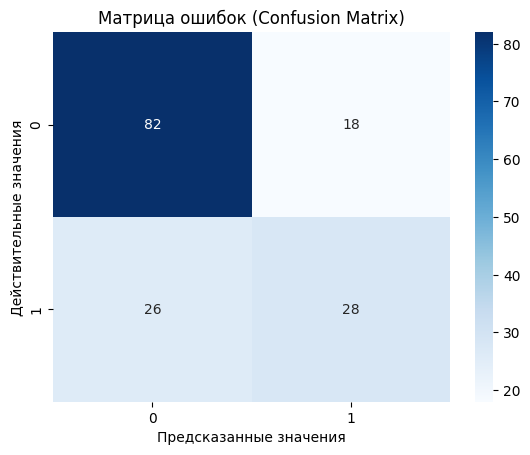

In [ ]:
def print_heatmap(y_test, y_pred):
    # Рисуем тепловую карту с аннотациями
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Матрица ошибок (Confusion Matrix)')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')


print_heatmap(y_test, y_pred)

### Оцените качество модели на тестовой выборке с помощью следующих метрик: (4)
*   a. достоверность предсказания (accuracy);
*   b. точность (precision);
*   c. полнота (recall);

In [ ]:
# a. достоверность предсказания (accuracy);
a = metrics.accuracy_score(y_test, y_pred)

a, metrics.accuracy_score(y_test, y_pred) == logistic.score(X_test, y_test)

(0.7142857142857143, True)

In [ ]:
# b. точность (precision);
b = metrics.precision_score(y_test, y_pred)

b

0.6086956521739131

In [ ]:
# c. полнота (recall);
c = metrics.recall_score(y_test, y_pred)

c

0.5185185185185185

---
### Сделайте вывод о применимости модели (5)

In [ ]:
lr_average = np.mean(np.array([a, b, c]))

print(f"Можно сделать вывод, что данная модель в среднем предскажет/распознает диабет у {np.around(lr_average * 100, 1)}% больных, а оставшиеся {100 - np.around(lr_average * 100, 1)}% пациентов будут классифицированы как здоровые.")

Можно сделать вывод, что данная модель в среднем предскажет/распознает диабет у 61.4% больных, а оставшиеся 38.6% пациентов будут классифицированы как здоровые.


## Дополнительные задания


1.   Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

2.   Сравните метрики эффективности и сделайте вывод о том, какая
модель лучше предсказывает заболевание.

3.   Постройте модели классификации на основе следующих методов:

    *   a. логистическая регрессия (LogisticRegression);
    *   b. метод опорных векторов с линейным ядром (SVC);
    *   c. метод опорных векторов с гауссовым ядром (SVC);
    *   d. метод k ближайших соседей (KNeighborsClassifier);
    *   e. многослойный перцептрон (MLP);
    *   f. другие методы по желанию;
4.   Проанализируйте метрики каждой модели и сделайте выводы об их
эффективности и применимости. Сравните эффективность всех этих
моделей и выберите лучшую;

5.   Для каждой модели из п.3 постройте кривые обучения и
диагностируйте недо-/переобучение модели. Попробуйте изменить
параметр регуляризации для улучшения результатов модели.

6.   Повторите полностью анализ для другой задачи - распознавание
вида ириса по параметрам растения (можно использовать метод
sklearn.datasets.load_iris()).

In [ ]:
BANK = pd.DataFrame(np.zeros((6, 6)), dtype=object, index="LogisticRegression SVC-Linear SVC-Gauss KNeighborsClassifier MLP CatBoostClassifier".split(), columns="confusion_matrix	accuracy	precision	recall average_APR order_DESC".split())
BANK.index.name = "methods"

BANK

,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Linear,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
BANK.loc["LogisticRegression"] = [lr_cm, a, b, c, lr_average, order]

BANK

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,"[[82, 18], [26, 28]]",0.714286,0.608696,0.518519,0.613833,"[6, 0, 5, 1, 7, 3, 4, 2]"
SVC-Linear,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def engine(model, X_train, X_test, y_train, y_test, flag=True):
    model.fit(X_train, y_train)


    y_pred =  model.predict(X_test)
    con_matrix = metrics.confusion_matrix(y_test, y_pred)


    if flag:
        order = print_coef(model, X_train.columns)



    print_heatmap(y_test, y_pred)


    a = metrics.accuracy_score(y_test, y_pred, average='weighted')
    b = metrics.precision_score(y_test, y_pred, average='weighted')
    c = metrics.recall_score(y_test, y_pred, average='weighted')
    average_abc = np.mean(np.array([a, b, c]))

    return [con_matrix, a, b, c, average_abc, order]

---
####  Используйте метод опорных векторов для построения альтернативной модели предсказания диабета (1)

SVC(kernel='linear', random_state=42)
Чем больше значение коэффициента, тем он значимее
***************************************************************************

   DiabetesPedigreeFunction    = 0.547347515503444
         Pregnancies           = 0.08848017347554915
             BMI               = 0.07697418743372708
           Glucose             = 0.031403680665903266
             Age               = 0.004993983263489099
           Insulin             = -0.00048545650588494027
        SkinThickness          = -0.0022252469913155437
        BloodPressure          = -0.010566173779068322
***************************************************************************




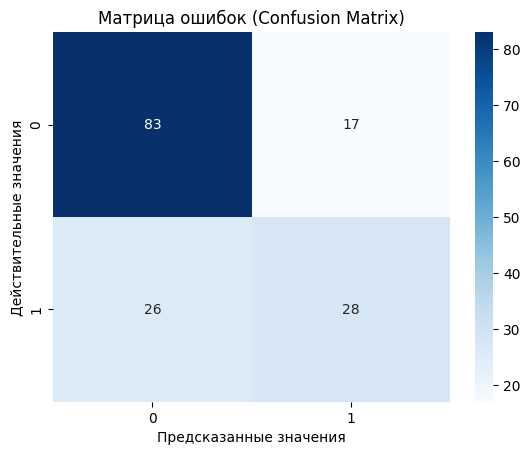

In [ ]:
from sklearn import svm

svc_linear = svm.SVC(kernel='linear', random_state=42)


svc_linear_row = engine(svc_linear, X_train, X_test, y_train, y_test)

In [ ]:
BANK.loc["SVC-Linear"] = svc_linear_row


BANK

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,"[[82, 18], [26, 28]]",0.714286,0.608696,0.518519,0.613833,"[6, 0, 5, 1, 7, 3, 4, 2]"
SVC-Linear,"[[83, 17], [26, 28]]",0.720779,0.622222,0.518519,0.620507,"[6, 0, 5, 1, 7, 4, 3, 2]"
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0


---
####  Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание (2)

Как видно выше, метод опорных векторов с линейным ядром определил TN на одно значение больше чем Логистическая регрессия \
(True Negative): Количество верно предсказанных отрицательных классов.

Это небольшое различие создает минимальную разницу между результатами этих двух методов. \
Так же минимально изменилось расположение признаков по значимости. \
Если у Логистической порядок признаков такой (это индесы, расположены по убыванию значения коэффициента): \
```
[6, 0, 5, 1, 7, 3, 4, 2]
```
То у SVC:
```
[6, 0, 5, 1, 7, 4, 3, 2]
```

**Это может указывать на то, что эти признаки вносят некоторый вклад в различия между моделями и могут иметь некоторое влияние на предсказания.** \
*В дальнейшем исследовании и интерпретации этих признаков можно обратить внимание на их значимость для моделей.*


---
### Постройте модели классификации на основе следующих методов: (3)

    *   a. логистическая регрессия (LogisticRegression);
    *   b. метод опорных векторов с линейным ядром (SVC);
    *   c. метод опорных векторов с гауссовым ядром (SVC);
    *   d. метод k ближайших соседей (KNeighborsClassifier);
    *   e. многослойный перцептрон (MLP);
    *   f. другие методы по желанию;

#### c. метод опорных векторов с гауссовым ядром (SVC);


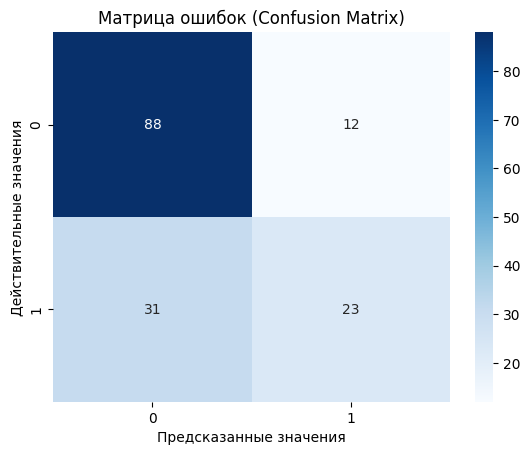

In [ ]:
svc_gauss = svm.SVC(kernel='rbf', random_state=42)


svc_gauss_row = engine(svc_gauss, X_train, X_test, y_train, y_test, flag=False)

In [ ]:
BANK.loc["SVC-Gauss"] = svc_gauss_row


BANK

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,"[[82, 18], [26, 28]]",0.714286,0.608696,0.518519,0.613833,"[6, 0, 5, 1, 7, 3, 4, 2]"
SVC-Linear,"[[83, 17], [26, 28]]",0.720779,0.622222,0.518519,0.620507,"[6, 0, 5, 1, 7, 4, 3, 2]"
SVC-Gauss,"[[88, 12], [31, 23]]",0.720779,0.657143,0.425926,0.601283,coef_ is only linear kernel
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0


#### d. метод k ближайших соседей (KNeighborsClassifier);


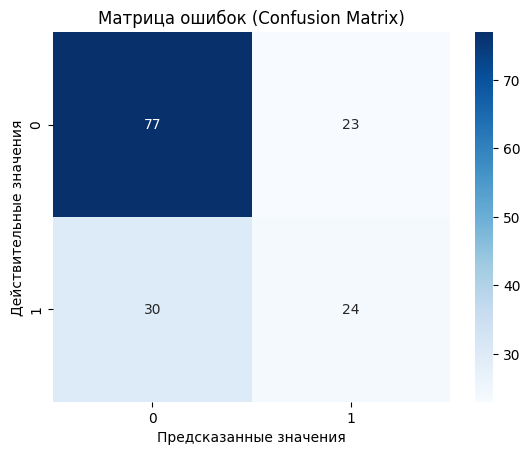

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(weights='distance')


neigh_row = engine(neigh, X_train, X_test, y_train, y_test, flag=False)

In [ ]:
BANK.loc["KNeighborsClassifier"] = neigh_row


BANK

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,"[[82, 18], [26, 28]]",0.714286,0.608696,0.518519,0.613833,"[6, 0, 5, 1, 7, 3, 4, 2]"
SVC-Linear,"[[83, 17], [26, 28]]",0.720779,0.622222,0.518519,0.620507,"[6, 0, 5, 1, 7, 4, 3, 2]"
SVC-Gauss,"[[88, 12], [31, 23]]",0.720779,0.657143,0.425926,0.601283,coef_ is only linear kernel
KNeighborsClassifier,"[[77, 23], [30, 24]]",0.655844,0.510638,0.444444,0.536976,coef_ is only linear kernel
MLP,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0


#### e. многослойный перцептрон (MLP);


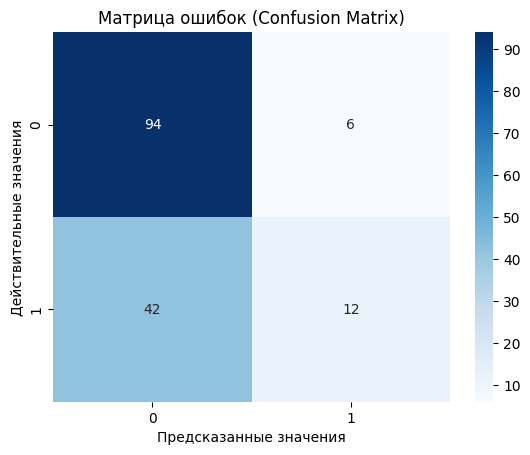

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()


mlp_row = engine(mlp, X_train, X_test, y_train, y_test, flag=False)

In [ ]:
BANK.loc["MLP"] = mlp_row


BANK

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,"[[82, 18], [26, 28]]",0.714286,0.608696,0.518519,0.613833,"[6, 0, 5, 1, 7, 3, 4, 2]"
SVC-Linear,"[[83, 17], [26, 28]]",0.720779,0.622222,0.518519,0.620507,"[6, 0, 5, 1, 7, 4, 3, 2]"
SVC-Gauss,"[[88, 12], [31, 23]]",0.720779,0.657143,0.425926,0.601283,coef_ is only linear kernel
KNeighborsClassifier,"[[77, 23], [30, 24]]",0.655844,0.510638,0.444444,0.536976,coef_ is only linear kernel
MLP,"[[94, 6], [42, 12]]",0.688312,0.666667,0.222222,0.525734,coef_ is only linear kernel
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0


#### f. CatBoostClassifier;


In [ ]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.9 MB/s eta 0:00:00


Learning rate set to 0.008365
0:	learn: 0.6885942	total: 2.14ms	remaining: 2.14s
1:	learn: 0.6840726	total: 3.89ms	remaining: 1.94s
2:	learn: 0.6803773	total: 5.42ms	remaining: 1.8s
3:	learn: 0.6766655	total: 7.34ms	remaining: 1.83s
4:	learn: 0.6735634	total: 9.26ms	remaining: 1.84s
5:	learn: 0.6702831	total: 11.1ms	remaining: 1.84s
6:	learn: 0.6667742	total: 13.1ms	remaining: 1.85s
7:	learn: 0.6633366	total: 15.2ms	remaining: 1.88s
8:	learn: 0.6587093	total: 17.1ms	remaining: 1.88s
9:	learn: 0.6548511	total: 19ms	remaining: 1.89s
10:	learn: 0.6515073	total: 21.3ms	remaining: 1.91s
11:	learn: 0.6480457	total: 23.3ms	remaining: 1.92s
12:	learn: 0.6443513	total: 25.8ms	remaining: 1.96s
13:	learn: 0.6404231	total: 27.8ms	remaining: 1.95s
14:	learn: 0.6367159	total: 29.6ms	remaining: 1.94s
15:	learn: 0.6337177	total: 31.3ms	remaining: 1.92s
16:	learn: 0.6300484	total: 33.1ms	remaining: 1.91s
17:	learn: 0.6271913	total: 34.9ms	remaining: 1.9s
18:	learn: 0.6245510	total: 36.7ms	remaining: 1.

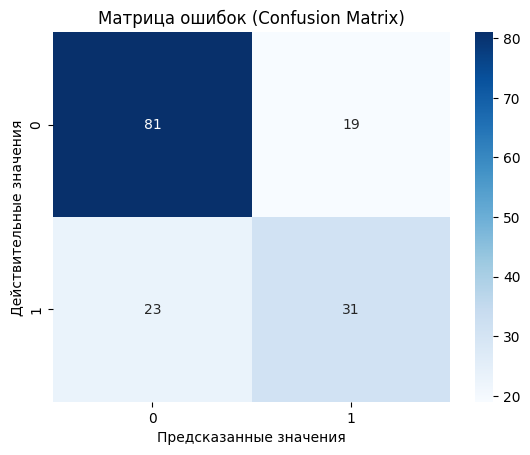

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(thread_count=-1,
                         random_seed=42)

cbc_row = engine(cbc, X_train, X_test, y_train, y_test, flag=False)

In [ ]:
BANK.loc["CatBoostClassifier"] = cbc_row


BANK

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,confusion_matrix,accuracy,precision,recall,average_APR,order_DESC
methods,,,,,,
LogisticRegression,"[[82, 18], [26, 28]]",0.714286,0.608696,0.518519,0.613833,"[6, 0, 5, 1, 7, 3, 4, 2]"
SVC-Linear,"[[83, 17], [26, 28]]",0.720779,0.622222,0.518519,0.620507,"[6, 0, 5, 1, 7, 4, 3, 2]"
SVC-Gauss,"[[88, 12], [31, 23]]",0.720779,0.657143,0.425926,0.601283,coef_ is only linear kernel
KNeighborsClassifier,"[[77, 23], [30, 24]]",0.655844,0.510638,0.444444,0.536976,coef_ is only linear kernel
MLP,"[[94, 6], [42, 12]]",0.688312,0.666667,0.222222,0.525734,coef_ is only linear kernel
CatBoostClassifier,"[[81, 19], [23, 31]]",0.727273,0.62,0.574074,0.640449,coef_ is only linear kernel


---
###  Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую (4)

In [ ]:
vals = np.array([BANK[col].values for col in "accuracy precision recall average_APR".split()]).T
answer = list(zip(BANK.index, vals))
answer = [(model, *metrics) for model, metrics in answer]
cols = BANK.columns[1:-1]



for i, col in enumerate(cols, 1):
    print(f"Лучшее значение по метрике {col:^12}: {sorted(answer, key=lambda x: x[i], reverse=True)[0][0]:^30}")


Лучшее значение по метрике   accuracy  :       CatBoostClassifier      
Лучшее значение по метрике  precision  :              MLP              
Лучшее значение по метрике    recall   :       CatBoostClassifier      
Лучшее значение по метрике average_APR :       CatBoostClassifier      


## Из полученного выше вытекают следующие выводы:


1.   **Лучшее значение по метрике accuracy (точность): CatBoostClassifier**

      *   *Модель CatBoostClassifier показывает наивысшую общую точность среди всех моделей. Это свидетельствует о том, что она лучше всего справляется с правильной классификацией образцов.*



2.   **Лучшее значение по метрике precision (точность по классу): MLP**

    *   *Модель MLP (многослойный персептрон) превосходит остальные модели по точности предсказания положительного класса. Это важно в случаях, когда минимизация ложных положительных результатов имеет значение.*



3.   **Лучшее значение по метрике recall (полнота): CatBoostClassifier**

    *   *Модель CatBoostClassifier также лидирует в полноте, что означает, что она лучше всего обнаруживает положительные случаи. Это важно, когда важна высокая способность модели к выявлению всех положительных образцов.*



4.   **Лучшее значение по метрике average_APR (средневзвешенное среднее accuracy, precision и recall): CatBoostClassifier**

    *   *CatBoostClassifier показала лучший баланс между точностью, полнотой и общей точностью (average_APR), усредненной по этим метрикам.*

